<a href="https://colab.research.google.com/github/piehyun/Datascience/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('english.csv') #데이터를 불러와 DataFrame 생성

df_corr = df.corr(method='pearson') #DataFrame 기반 상관계수 도출
df_corr #조합 별 상관 계수를 출력

,TOEIC,TEPS,TOEFL
TOEIC,1.000000,0.981703,0.065584
TEPS,0.981703,1.000000,0.022775
TOEFL,0.065584,0.022775,1.000000


In [ ]:
df_corr = df.corr(method='spearman')
df_corr

,TOEIC,TEPS,TOEFL
TOEIC,1.000000,0.975957,0.063057
TEPS,0.975957,1.000000,0.017817
TOEFL,0.063057,0.017817,1.000000


In [ ]:
ani_df = pd.read_csv('animal.csv')
ani_df_corr = ani_df.corr(method='pearson')
ani_df_corr

,temperature,height
temperature,1.000000,-0.999257
height,-0.999257,1.000000


In [ ]:
ani_df_corr = ani_df.corr(method='spearman')
ani_df_corr

,temperature,height
temperature,1.000000,-0.992689
height,-0.992689,1.000000


In [ ]:
ani_df_corr = ani_df.corr(method='kendall')
ani_df_corr

,temperature,height
temperature,1.000000,-0.956522
height,-0.956522,1.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('score.csv')
df_x = df[['1st','2nd','3rd','6mo', '9mo']]
df_y = df['suneung']

x_train, x_valid, y_train, y_valid = train_test_split(df_x, df_y, random_state = 0, test_size = 0.20)
y_train

134    231
145    227
63     257
293    186
285    189
      ... 
251    197
192    212
117    235
47     264
172    218
Name: suneung, Length: 240, dtype: int64

In [ ]:
reg = LinearRegression() #선형 회귀 모형 생성
reg.fit(x_train, y_train) #학습 데이터의 x와 y를 이용, 회귀 모형 적합

print(reg.coef_) # 학습 데이터로 도출된 회귀 계수 출력
print(reg.intercept_) #학습 데이터로 도출된 상수항 출력

[ -4.12462039  -7.85273068 -10.95632839   0.2251513    0.52659391]
174.18123037171398


In [ ]:
y_pred = reg.predict(x_valid) #train으로 학습, validattion으로 검증, 60명의 수능 성적 예측치
y_pred

array([223.52732146, 224.97237723, 278.22617706, 225.56972787,
       203.69507012, 221.95872734, 206.98157694, 198.84623827,
       265.45563879, 230.24905819, 181.00377126, 258.3184048 ,
       209.131353  , 213.55556769, 277.34225618, 248.31442747,
       216.36379344, 261.77779206, 211.98080589, 246.76592418,
       219.14836521, 242.36642385, 229.19745871, 246.58309307,
       202.20238607, 255.2829823 , 224.83708533, 201.49959911,
       198.91363557, 206.06320189, 221.31777721, 248.22851004,
       258.43314747, 224.07208721, 225.9926627 , 224.39663525,
       214.85447795, 220.26979407, 201.28146784, 267.31276239,
       210.91544881, 236.029723  , 239.46806481, 242.33382424,
       249.79605826, 220.25948958, 216.03915791, 230.40557755,
       273.24493433, 241.16572666, 270.19805562, 200.29247656,
       223.4505752 , 235.91082173, 234.98635833, 209.05859773,
       202.00456442, 286.5585544 , 192.24510093, 206.80776245])

In [ ]:
y_valid # 60명의 수능 성적

208    208
188    213
12     287
221    205
239    201
136    229
230    204
206    209
52     261
108    237
290    186
15     285
184    215
248    198
22     280
74     253
270    192
90     244
229    204
164    220
190    213
103    238
124    234
129    232
222    205
116    235
194    211
286    189
234    203
295    185
92     243
66     256
8      295
122    234
219    205
150    224
176    217
182    215
299    184
5      296
223    205
89     245
81     249
34     272
55     260
139    229
236    201
64     257
7      295
45     264
73     253
213    207
173    218
106    237
59     259
253    196
168    219
26     276
284    189
153    223
Name: suneung, dtype: int64

In [ ]:
#exercise 2

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('effect.csv')
df_x = df[['lip','tie']]
df_y = df['econ']

x_train, x_valid, y_train, y_valid = train_test_split(df_x, df_y, random_state = 0, test_size = 0.20)
y_train

134    6574
66     5181
26     9940
113    9962
168    9736
       ... 
67     8917
192    4804
117    7193
47     5555
172    5031
Name: econ, Length: 160, dtype: int64

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

r2_score(y_valid,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [40, 60]

In [ ]:
from sklearn.linear_model import Lasso

reg_Lasso = Lasso(alpha= 0) #alpha 높이니 결과에서 하나 죽었다 -> 변수 날림 (라쏘가 훨씬 억누름)
reg_Lasso.fit(x_train, y_train)
y_pred_Lasso = reg_Lasso.predict(x_valid)

print(reg_Lasso.coef_)
print(reg_Lasso.intercept_)

[6.94492619 3.02792831]
38.16401543603661


<ipython-input-15-60f76973aca8>:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg_Lasso.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.649e+05, tolerance: 9.701e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.linear_model import Ridge

reg_Ridge = Ridge(alpha= 15)
reg_Ridge.fit(x_train, y_train)
y_pred_Ridge = reg_Ridge.predict(x_valid)

print(reg_Ridge.coef_) # 다 살았어 -> 변수 적당히 가져감
print(reg_Ridge.intercept_)

[ -4.02478466  -7.66551646 -10.69847705   0.22189356   0.51967997]
173.88435257774162


In [ ]:
!pip install graphviz

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
df = pd.read_excel('telecom.xlsx')
df = pd.get_dummies(df, columns = ['Technology'])
df_x = df.iloc[:, [0,1,2,4,5,6,7]]
df_y = df['Leave']

tree_model = DecisionTreeClassifier(criterion = 'gini',max_depth = 3, min_samples_leaf = 5)
tree_model.fit(df_x, df_y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

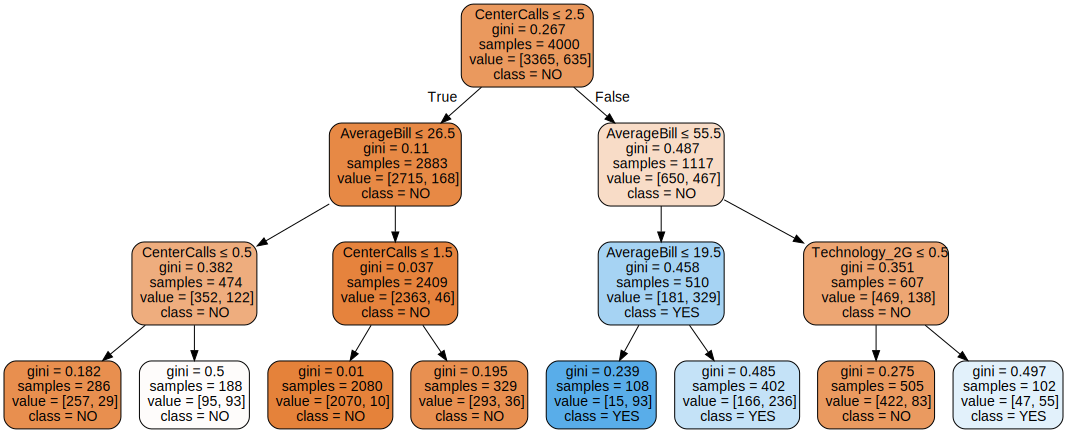

In [ ]:
dot_data = export_graphviz(tree_model, out_file = None, feature_names = df_x.columns, class_names = tree_model.classes_,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph

## Exercise 3

In [ ]:
!pip install graphviz

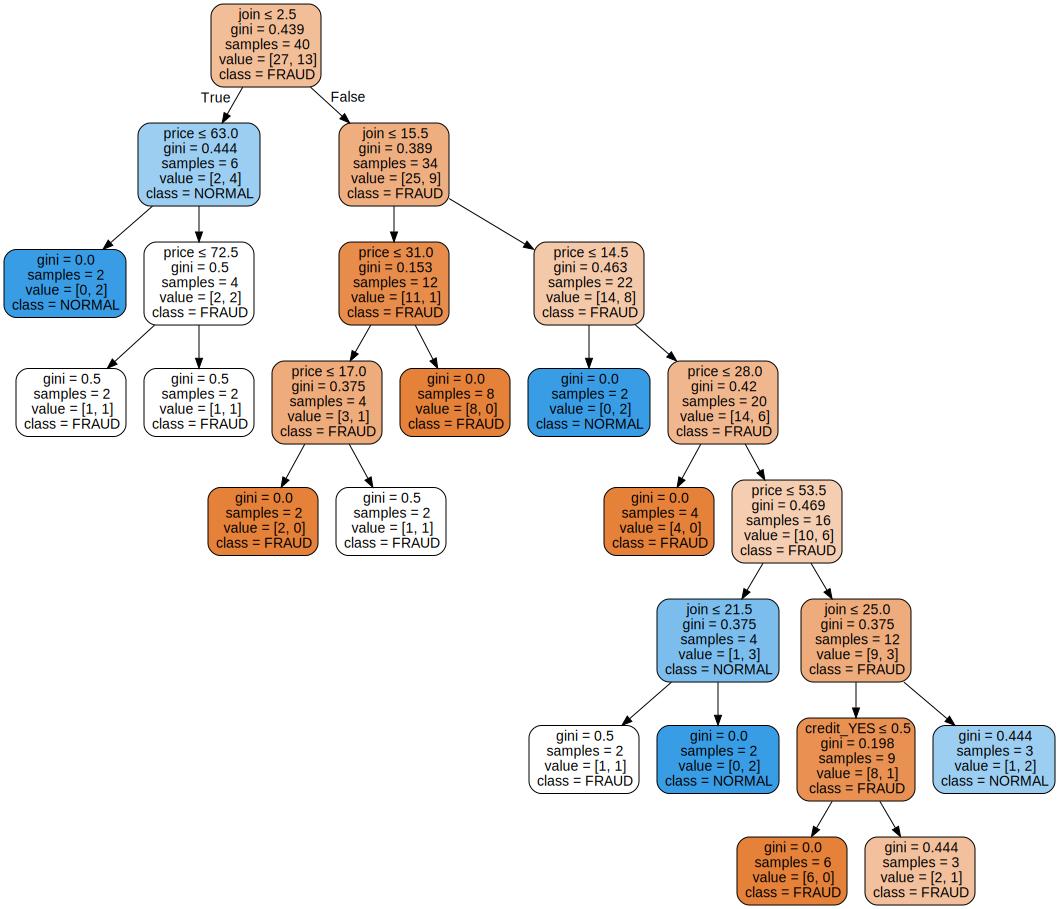

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

df = pd.read_csv('market.csv')
df = pd.get_dummies(df, columns= ['credit'])
df_x = df.iloc[:, [0,1,4]]
df_y = df['FraudOrNot']


tree_model = DecisionTreeClassifier(criterion='gini', min_samples_leaf = 2)
tree_model.fit(df_x,df_y)

dot_data = export_graphviz(tree_model, out_file = None, feature_names = df_x.columns, class_names = tree_model.classes_,
                           filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph